# Geopandas Intro

**Inhalt:** Erste Schritte mit Geopandas

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas

**Lernziele**
- Shapes kennenlernen
- Punkte und Linien erstellen
- Geodataframes erstellen
- Geometrien definieren
- Plotten in Geopandas

## Das Beispiel

Bergbahnen in der Schweiz

## Setup

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString

In [3]:
from IPython.display import Image

In [4]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## Import

**Ein Shapefile für die Schweizer Kantone**

Dieses File brauchen wir erst ganz am Schluss.

In [5]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

In [6]:
gdf_kantone.head(2)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.202 281173.707, 692993.467 28..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,"MULTIPOLYGON (((573502.204 194804.720, 573996...."


**Eine Liste der Bergbahnen**

Mit dieser Liste werden wir hauptsächlich arbeiten.

In [7]:
df_bergbahnen = pd.read_excel('dataprojects/Projections/data/bergbahnen3D.xlsx')

In [8]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902


In [9]:
df_bergbahnen['OBJEKTART'].value_counts()

Skilift         841
Sesselbahn      365
Luftseilbahn    327
Gondelbahn      124
Name: OBJEKTART, dtype: int64

## Geometrien in Geopandas

Geodataframes sind eigentlich nichts anderes als normale Dataframes. Mit einem Unterschied: Eine Spalte im Geodataframe hat eine besondere Funktion: Hier sind geometrische Informationen enthalten.

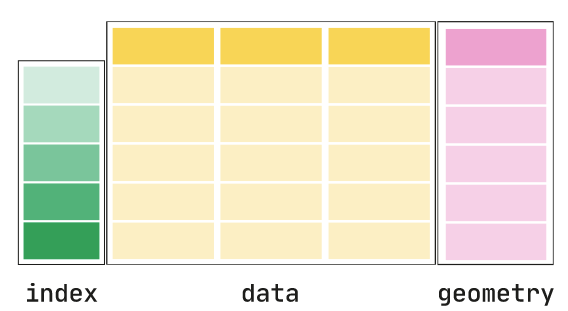

In [10]:
Image("dataprojects/Intro/geodataframe.png")

In unserem Shapefile der Kantone (\*.shp) ist bereits eine Geometrie definiert: Eine separate Spalte in jedem Kanton ist dafür reserviert.

In [11]:
gdf_kantone.columns

Index(['KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX', 'Y_MIN', 'Y_MAX',
       'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'E_MIN',
       'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR', 'geometry'],
      dtype='object')

In der Geometrie-Spalte sind (Überraschung!) geometrische Informationen drin. In diesem Fall: ein Polygon.

In [12]:
gdf_kantone.geometry

0     POLYGON ((692429.202 281173.707, 692993.467 28...
1     MULTIPOLYGON (((573502.204 194804.720, 573996....
2     POLYGON ((662037.558 237690.723, 662271.728 23...
3     POLYGON ((688456.999 203340.000, 688740.000 20...
4     POLYGON ((705202.678 229721.111, 706142.258 22...
5     MULTIPOLYGON (((671653.400 190588.001, 671407....
6     POLYGON ((671798.251 206022.836, 672021.878 20...
7     POLYGON ((723477.400 221272.410, 723896.499 22...
8     POLYGON ((674191.900 231111.999, 674454.750 23...
9     MULTIPOLYGON (((549140.980 178013.761, 549375....
10    MULTIPOLYGON (((619250.502 223755.124, 619395....
11    POLYGON ((619154.867 272278.575, 617536.204 27...
12    MULTIPOLYGON (((595269.700 251478.499, 594298....
13    MULTIPOLYGON (((686912.793 272390.067, 686814....
14    POLYGON ((758852.593 259182.820, 758918.982 25...
15    MULTIPOLYGON (((746530.217 250212.577, 746449....
16    POLYGON ((759598.570 267841.931, 760034.120 26...
17    POLYGON ((760618.874 213990.948, 760944.58

Daher können wir die 26 Schweizer Kantone auch ganz einfach plotten. Und zwar mit`plot()`:

<AxesSubplot:>

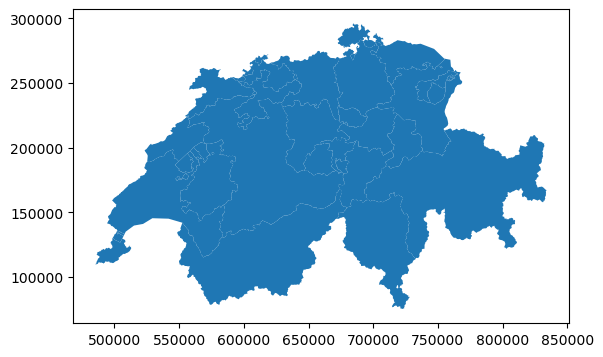

In [13]:
gdf_kantone.plot()

Unsere Bergbahnen-Liste hat allerdings noch keine Geometrie-Spalte:

In [14]:
df_bergbahnen.columns

Index(['OBJEKTART', 'NAME', 'MIN_E', 'MIN_N', 'MIN_Z', 'MAX_E', 'MAX_N',
       'MAX_Z'],
      dtype='object')

Daher kommt mit dem `plot()`-Befehl auch noch nichts sinnvolles raus:

<AxesSubplot:>

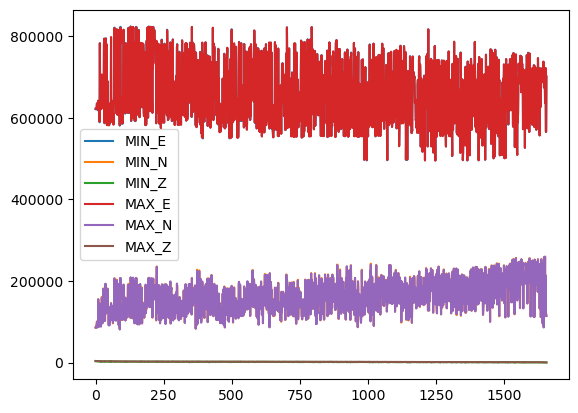

In [15]:
df_bergbahnen.plot()

Bevor wir irgendwas plotten können, müssen wir erst eine Geometrie erstellen!

**Dazu müssen wir einige Dinge klären:**
- Welche Art von Geometrie wollen wir kreieren?
- Gibt es mehrere Möglichkeiten?
- Welches sind die nötigen Informationen dafür?

### Geometrie erstellen

**Zur Erinnerung: Points()-Funktion**

Diese Funktion brauchen wir, um eine Punkt-Geometrie zu erstellen.

So erstellen Sie einen Punkt am Ort (5, -7)

In [16]:
x = 5
y = -7

In [17]:
punkt = Point(x, y)

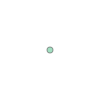

In [18]:
punkt

**In Pandas arbeiten mit apply()**

Unser Ziel ist: eine Spalte in unserem Dataframe zu haben, die für jede Bergbahn eine Punkt-Geometrie enthält.

Mit anderen Worten: Wir müssen die x- und y-Koordinaten für jeden Eintrag aus der Tabelle auslesen und mit `Point()` zu einer Punkt-Geometrie machen.

In Pandas funktioniert das folgendermassen:

In [19]:
df_bergbahnen['Punkt1'] = df_bergbahnen.apply(lambda row: Point(row['MIN_E'], row['MIN_N']), axis=1)

In [20]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


Zum technischen Verständnis:
- Wir haben mit dem `lambda`-Keyword eine Funktion definiert, welche die `Points()`-Funktion aufruft
- Dann haben wir diese (namenlose) Funktion mit `apply()` für jede Zeile in der Tabelle angewandt

Das Ergebnis ist: Wir haben jetzt eine Geometrie erstellt

Jetzt müssen wir Geopandas noch mitteilen, dass wir diese Geometrie verwenden wollen!

### Geopandas

Mit anderen Worten: Wir müssen aus dem Dataframe erst ein Geodataframe erstellen!

**Geodataframe konstruieren**

Die Konstruktor-Funktion heisst `GeoDataFrame()`. Zwei Infos sind nötig:
- Aus welchem Dataframe soll ein Geodataframe werden
- Welche Spalte soll die Geometrie definieren

In [21]:
gdf_bergbahnen = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

In [22]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759.000 85777.000)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730.000 86797.000)


Jetzt können wir plotten:

In [23]:
gdf_bergbahnen.geometry

0        POINT (621759.000 85777.000)
1        POINT (622730.000 86797.000)
2        POINT (621991.000 91079.000)
3        POINT (621542.000 87239.000)
4        POINT (621517.000 87222.000)
                    ...              
1652    POINT (697094.000 115996.000)
1653    POINT (722244.000 213641.000)
1654    POINT (565980.000 118163.000)
1655    POINT (566282.000 119385.000)
1656    POINT (701713.000 114240.000)
Name: Punkt1, Length: 1657, dtype: geometry

<AxesSubplot:>

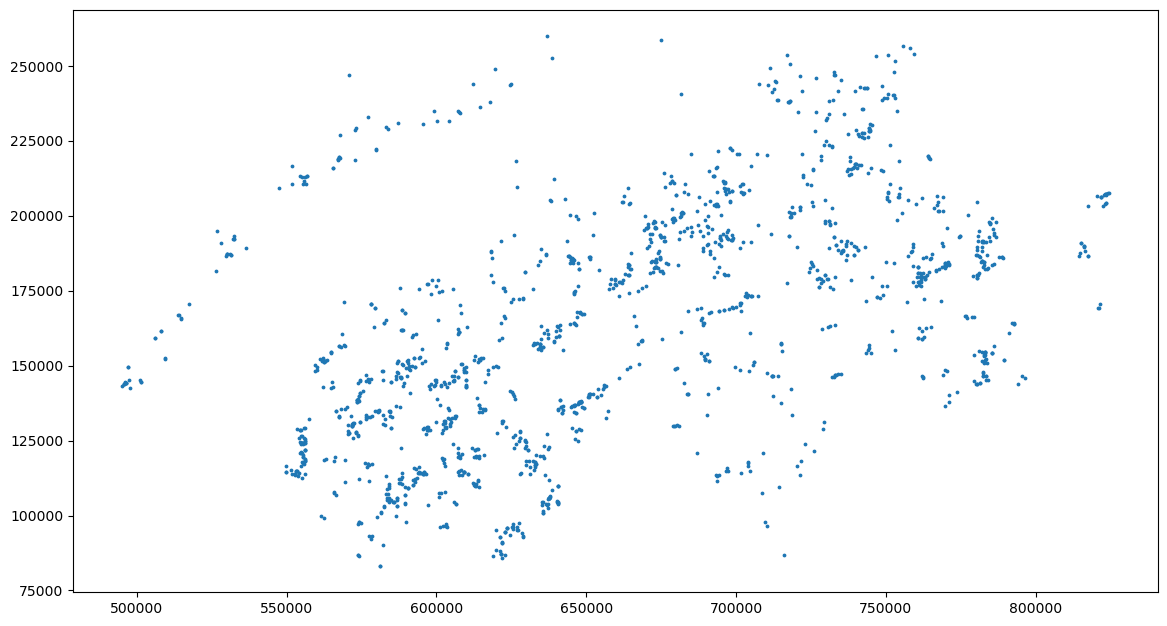

In [24]:
gdf_bergbahnen.plot(figsize=(14,10), markersize=3)

Oder zB auch nur einzele, ausgewählte Objekte:

<AxesSubplot:>

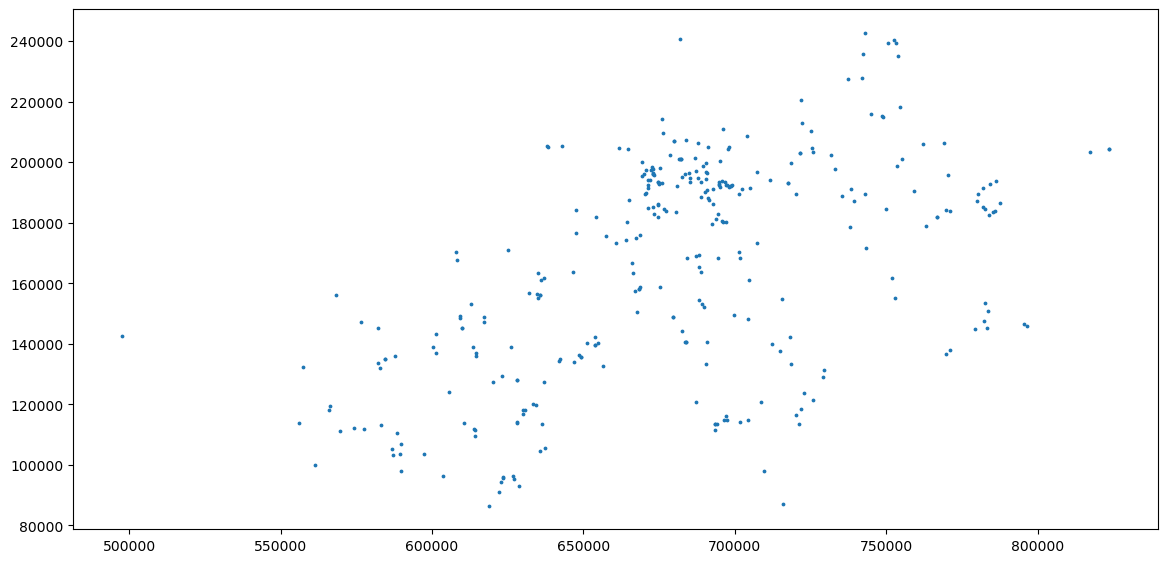

In [25]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

## Geometrien 2

Allerdings - moment mal. Unsere Seilbahnen sind eigentlich keine Punkte, sondern müssten eigentlich eine Linie sein - mit einem Anfang und einem Ende.

### Linie (again!)

**Quiz:** Erstellen Sie eine Linie durch die Punkte (8, 6) und (4, 10)

In [26]:
x1 = 8
y1 = -6

In [27]:
x2 = 4
y2 = 10

In [28]:
linie = LineString([Point(x1, y1), Point(x2, y2)])

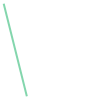

In [29]:
linie

### in Pandas

**Einen zweiten Punkt erstellen**

Quiz: Erstellen Sie für jede Zeile einen Punkt2 anhand der Spalten 'MAX_E' und 'MAX_N'

Tipp: Wir wollen eine lambda-Funktion dafür verwenden

In [30]:
gdf_bergbahnen['Punkt2'] = gdf_bergbahnen.apply(lambda row: Point(row['MAX_E'], row['MAX_N']), axis=1)

In [31]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759.000 85777.000),POINT (622992.000 85864.000)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730.000 86797.000),POINT (622992.000 85867.000)


**Eine Linie daraus machen**

Quiz: Erstellen Sie für jede Zeile eine Linie anhand der beiden Punkt-Spalten, die wir zuvor erstellt haben

In [32]:
gdf_bergbahnen['Linie'] = gdf_bergbahnen.apply(lambda row: LineString([row['Punkt1'], row['Punkt2']]), axis=1)

In [33]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2,Linie
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759.000 85777.000),POINT (622992.000 85864.000),"LINESTRING (621759.000 85777.000, 622992.000 8..."
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730.000 86797.000),POINT (622992.000 85867.000),"LINESTRING (622730.000 86797.000, 622992.000 8..."


**Geometrie neu setzen**

Quiz: Stellen Sie die Geometrie des GDF um auf die Linien-Spalte

In [34]:
gdf_bergbahnen = gdf_bergbahnen.set_geometry('Linie')

**Und Plot:**

Quiz: Ein Plot von allen Luftseilbahnen

<AxesSubplot:>

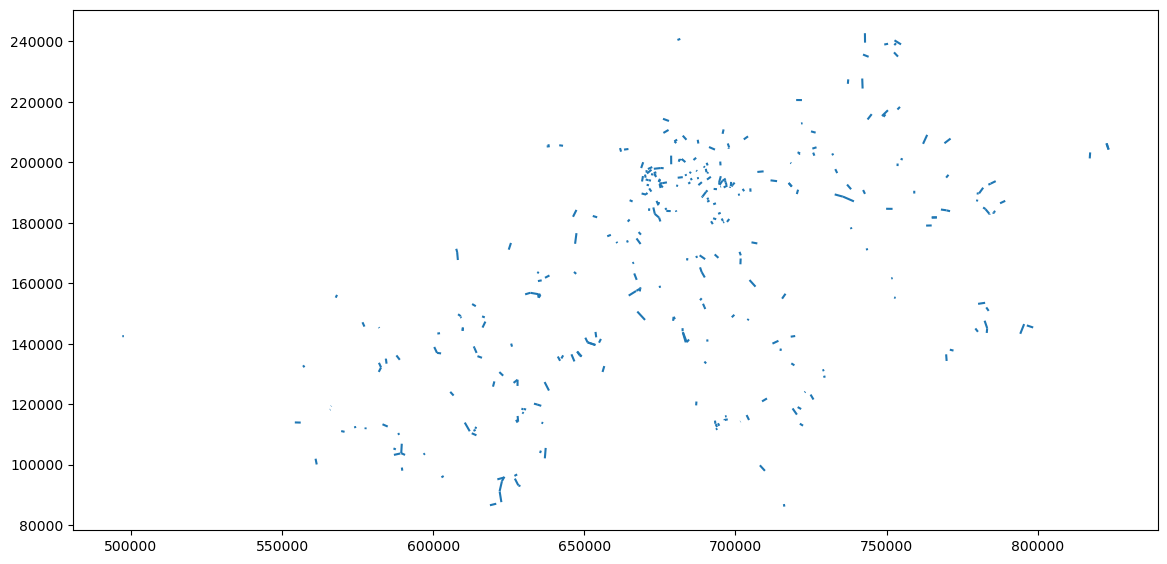

In [35]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

In [36]:
gdf_bergbahnen.geometry

0       LINESTRING (621759.000 85777.000, 622992.000 8...
1       LINESTRING (622730.000 86797.000, 622992.000 8...
2       LINESTRING (621991.000 91079.000, 622561.000 8...
3       LINESTRING (621542.000 87239.000, 621973.000 8...
4       LINESTRING (621517.000 87222.000, 621903.000 8...
                              ...                        
1652    LINESTRING (697094.000 115996.000, 696551.000 ...
1653    LINESTRING (722244.000 213641.000, 722058.000 ...
1654    LINESTRING (565980.000 118163.000, 565845.000 ...
1655    LINESTRING (566282.000 119385.000, 566207.000 ...
1656    LINESTRING (701713.000 114240.000, 701621.000 ...
Name: Linie, Length: 1657, dtype: geometry

## Mehrere Layer

Was sich immer gut macht, ist, eine Liste von Punkten auf irgendeinen geografischen Basislayer zu plotten.

An dieser Stelle verwenden wir:
- Das Geodataframe mit den Kantonen
- Das Geodagaframe mit den Bergbahnen

<AxesSubplot:>

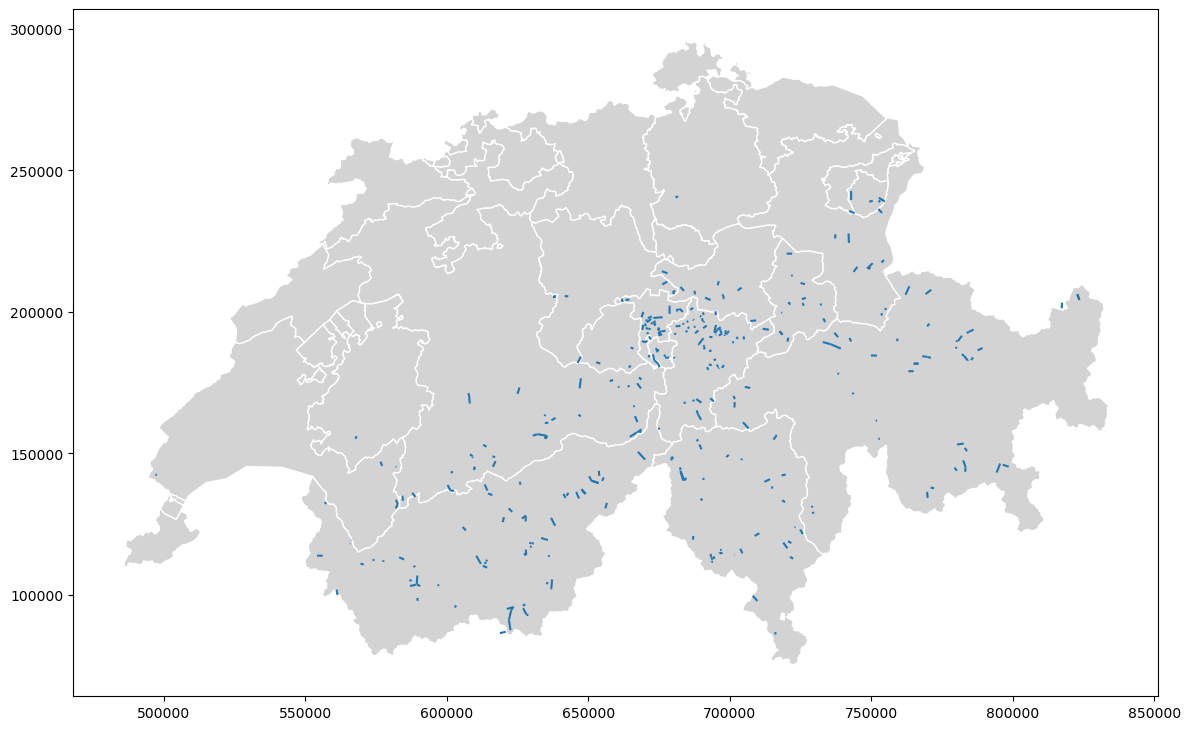

In [37]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3, ax=ax)